# Azure AI multiservice API for detecting people

Based on first part of [this MS Learn manual](https://microsoftlearning.github.io/mslearn-ai-vision/Instructions/Exercises/04-face-service.html).

In [ ]:
%pip install azure-ai-vision-imageanalysis==1.0.0b3

In [5]:
from dotenv import load_dotenv
import os
from PIL import Image, ImageDraw
import sys
from matplotlib import pyplot as plt
import numpy as np

from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

# Get Configuration Settings
load_dotenv()
ai_endpoint = os.getenv('AI_SERVICE_ENDPOINT')
ai_key = os.getenv('AI_SERVICE_KEY')

In [3]:
# Get image
image_file = os.path.join (os.getcwd(), "data", "test-images", "people.jpg")
with open(image_file, "rb") as f:
    image_data = f.read()

In [6]:
# Authenticate Azure AI Vision client
cv_client = ImageAnalysisClient(
    endpoint=ai_endpoint,
    credential=AzureKeyCredential(ai_key)
)

In [9]:
# Analyze image
# Get result from Azure AI Vision client with specified features to be retrieved (PEOPLE)
result = cv_client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.PEOPLE],
)
print(result)

{'modelVersion': '2023-10-01', 'metadata': {'width': 800, 'height': 514}, 'peopleResult': {'values': [{'boundingBox': {'x': 454, 'y': 73, 'w': 345, 'h': 439}, 'confidence': 0.9518219828605652}, {'boundingBox': {'x': 87, 'y': 0, 'w': 491, 'h': 513}, 'confidence': 0.9195324778556824}, {'boundingBox': {'x': 219, 'y': 169, 'w': 256, 'h': 199}, 'confidence': 0.003917292691767216}, {'boundingBox': {'x': 783, 'y': 320, 'w': 16, 'h': 189}, 'confidence': 0.0028988136909902096}]}}



People in image:
 {'x': 454, 'y': 73, 'w': 345, 'h': 439} (confidence: 95.18%)
 {'x': 87, 'y': 0, 'w': 491, 'h': 513} (confidence: 91.95%)
  Results saved in c:\DY\Programming\Azure-AI\Azure-AI\data\output\people2.jpg


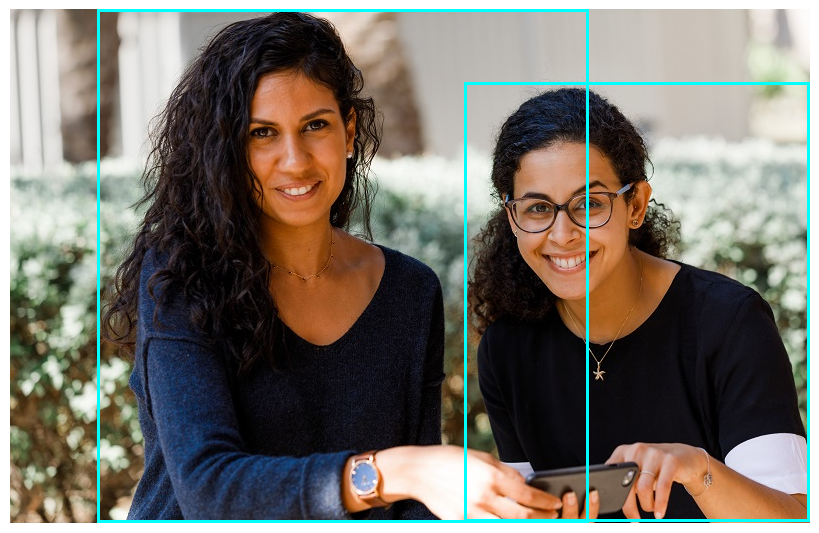

In [12]:
# Identify people in the image
if result.people is not None:
    print("\nPeople in image:")

    # Prepare image for drawing
    image = Image.open(image_file)
    fig = plt.figure(figsize=(image.width/100, image.height/100))
    plt.axis('off')
    draw = ImageDraw.Draw(image)
    color = 'cyan'

    # Draw bounding box around detected people
    for detected_people in result.people.list:
        if(detected_people.confidence > 0.5):
            # Draw object bounding box
            r = detected_people.bounding_box
            bounding_box = ((r.x, r.y), (r.x + r.width, r.y + r.height))
            draw.rectangle(bounding_box, outline=color, width=3)

            # Return the confidence of the person detected
            print(" {} (confidence: {:.2f}%)".format(detected_people.bounding_box, detected_people.confidence * 100))

    # Save annotated image
    plt.imshow(image)
    plt.tight_layout(pad=0)
    outputfile = os.path.join (os.getcwd(), "data", "output", "people2.jpg")
    fig.savefig(outputfile)
    print('  Results saved in', outputfile)
else:
    print("No people detected in image")